# Percentage of Volume (POV) with 3* 3 grid using Minute Bar Data


In [ ]:
# TODO: implement target function and tolerance functions

## Parameters
Parameters: &lt;side&gt; &lt;quantity&gt; &lt;pct_volume&gt; [limit_px] 

side = "b" (buy) or "s" (sell)

quantity = # of shares

pct_volume = percentage of volume to target

limit_px = limit price (optional)

### Structure
1. Get market data
1. Determine order parameters 
1. Initiate loop (reading market data)
    1. Read each bin of data
    1. Calculate % of volume and bin price (last for now)
    1. Accumulate the trade per bin
1. Calculate and plot summary statistics (average price, slippage vs. vwap, vs. arrival, vs. interval vwap

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## create pov trade function

In [4]:
symbol = 'LYFT'
day = pd.DataFrame() 
date = '2019-04-12'
%run getstock.py
bars = getMinuteStockPrices(symbol)
day = bars[date]
def pov_trade(qty, pov):
    # get our market data, plot it to sanity check
    trade_results = pd.DataFrame(index = day.index)
        
    # order parameters
    quantity = qty
    pct_volume = pov
    quantity_remaining = quantity
    trades = pd.DataFrame( columns = [ 'price' , 'shares'], index=day.index )

    # main event loop
    for index, row in day.iterrows() :
        # Read each bin of data
        # calculate midpoint of that bar
        px = ( row[ 'high' ] + row[ 'low' ] ) / 2 
        volume = row[ 'volume' ]
    
        # Calculate % of volume and bin price (last for now)
        new_trade = min( pct_volume * volume, quantity_remaining )
    
        # Accumulate the trade per bin
        trades.loc[index] = [px, new_trade]
    
        # decrement the remaining qty, and bail out if it's zero
        quantity_remaining -= new_trade
    
        # debug
        #print( str(volume) + " " + str(new_trade) + " " + str(quantity_remaining) )
    
        if ( quantity_remaining <= 0 ):
            break
            
    ### Analysis of POV Order
    trade_results['mkt_px'] = pd.Series(day['close'])
    trade_results['trade_px'] = pd.Series(trades['price'])
    trade_results['trade_shares'] = pd.Series(trades['shares'])
    return trade_results  

## draw 3*3 grid pictures

In [5]:

qty = [500000, 1000000, 7000000]
pov = [0.05, 0.15, 0.25]
trade_results_dict = {}
k = 0
for i in range(len(qty)):
    for j in range(len(pov)):
        trade_results_dict[k] = pov_trade(qty[i], pov[j])
        k += 1    
    



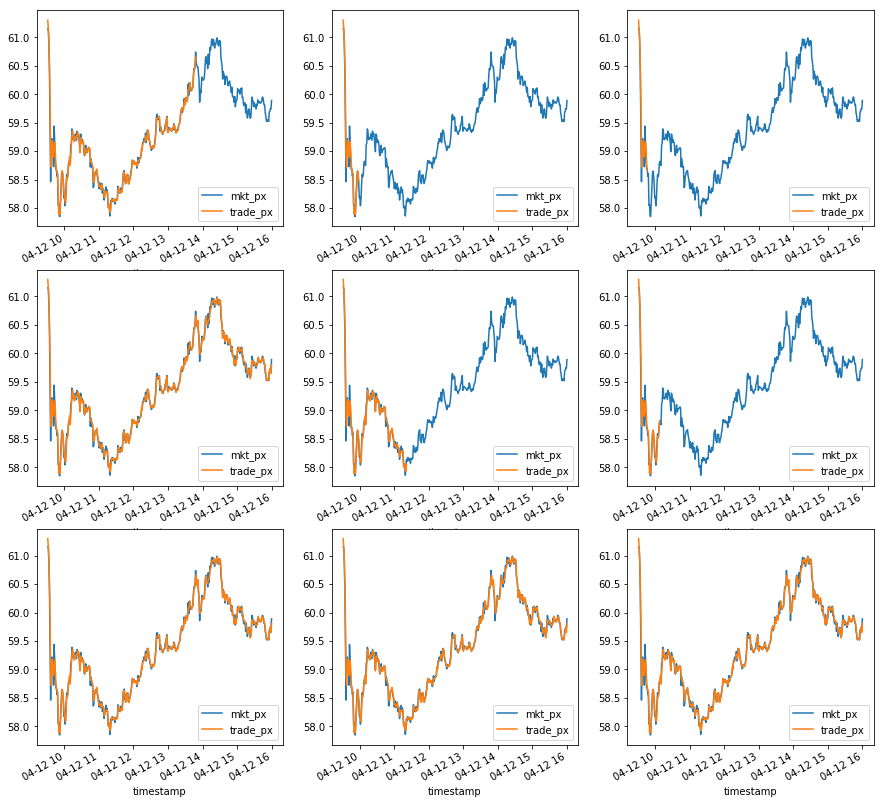

In [6]:
### Let's look at the trade price
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
trade_results0 = trade_results_dict[0]
trade_results0_price = trade_results0.drop('trade_shares', 1)
trade_results0_price.plot(ax = axes[0, 0]) 
trade_results1 = trade_results_dict[1]
trade_results1_price = trade_results1.drop('trade_shares', 1)
trade_results1_price.plot(ax = axes[0, 1])  
trade_results2 = trade_results_dict[2]
trade_results2_price = trade_results2.drop('trade_shares', 1)
trade_results2_price.plot(ax = axes[0, 2]) 
trade_results3 = trade_results_dict[3]
trade_results3_price = trade_results3.drop('trade_shares', 1)
trade_results3_price.plot(ax = axes[1, 0]) 
trade_results4 = trade_results_dict[4]
trade_results4_price = trade_results4.drop('trade_shares', 1)
trade_results4_price.plot(ax = axes[1, 1]) 
trade_results5 = trade_results_dict[5]
trade_results5_price = trade_results5.drop('trade_shares', 1)
trade_results5_price.plot(ax = axes[1, 2]) 
trade_results6 = trade_results_dict[6]
trade_results6_price = trade_results6.drop('trade_shares', 1)
trade_results6_price.plot(ax = axes[2, 0]) 
trade_results7 = trade_results_dict[7]
trade_results7_price = trade_results7.drop('trade_shares', 1)
trade_results7_price.plot(ax = axes[2, 1]) 
trade_results8 = trade_results_dict[8]
trade_results8_price = trade_results8.drop('trade_shares', 1)
trade_results8_price.plot(ax = axes[2, 2]) 
plt.show()



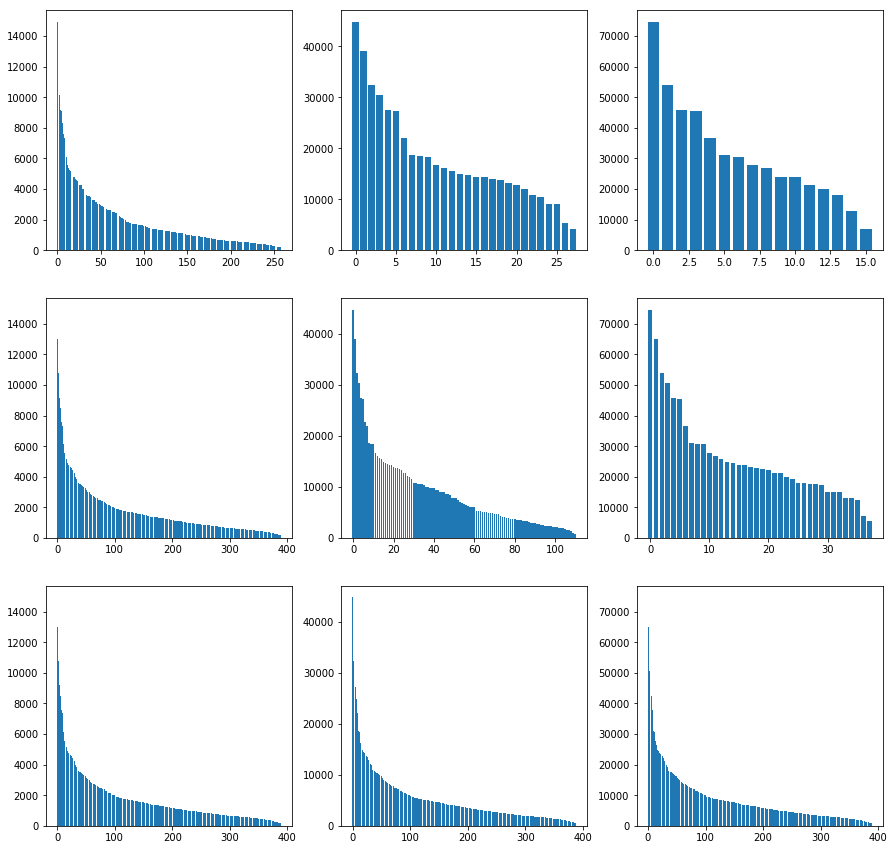

In [7]:
### Let's look at the trade sizes
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
raw_bar0_array = trade_results0['trade_shares'].dropna().sort_values(ascending=False).values
x0 = np.arange(len(raw_bar0_array))
ax[0, 0].bar(x0, raw_bar0_array)
raw_bar1_array = trade_results1['trade_shares'].dropna().sort_values(ascending=False).values
x1 = np.arange(len(raw_bar1_array))
ax[0, 1].bar(x1, raw_bar1_array)
raw_bar2_array = trade_results2['trade_shares'].dropna().sort_values(ascending=False).values
x2 = np.arange(len(raw_bar2_array))
ax[0, 2].bar(x2, raw_bar2_array)
raw_bar3_array = trade_results3['trade_shares'].dropna().sort_values(ascending=False).values
x3 = np.arange(len(raw_bar3_array))
ax[1, 0].bar(x3, raw_bar3_array)
raw_bar4_array = trade_results4['trade_shares'].dropna().sort_values(ascending=False).values
x4 = np.arange(len(raw_bar4_array))
ax[1, 1].bar(x4, raw_bar4_array)
raw_bar5_array = trade_results5['trade_shares'].dropna().sort_values(ascending=False).values
x5 = np.arange(len(raw_bar5_array))
ax[1, 2].bar(x5, raw_bar5_array)
raw_bar6_array = trade_results6['trade_shares'].dropna().sort_values(ascending=False).values
x6 = np.arange(len(raw_bar6_array))
ax[2, 0].bar(x6, raw_bar6_array)
raw_bar7_array = trade_results7['trade_shares'].dropna().sort_values(ascending=False).values
x7 = np.arange(len(raw_bar7_array))
ax[2, 1].bar(x7, raw_bar7_array)
raw_bar8_array = trade_results8['trade_shares'].dropna().sort_values(ascending=False).values
x8 = np.arange(len(raw_bar8_array))
ax[2, 2].bar(x8, raw_bar8_array)
plt.show()

## Calculate the 5 day averages slippage from arrival price and VWAP for your stock as above. 

In [16]:
# average trade price
pavg_dict = {}
slippage_dict = {}
k = 9
for k in range(k):
    pavg_dict[k] = (trade_results_dict[k]['trade_px'] * trade_results_dict[k]['trade_shares'] ).sum() /  trade_results_dict[k]['trade_shares'].sum()

# calculate VWAP
vwap = (day['close'] * day['volume']).sum() / day['volume'].sum()
k = 9
for k in range(k):
    slippage_dict[k] =  ((vwap - pavg_dict[k]) / vwap) * 10000

print("VWAP: %.4f" % vwap)
print("Pavg0: {0:.4f} Pavg1: {1:.4f} Pavg2: {2:.4f}Pavg3: {3:.4f} Pavg4: {4:.4f} Pavg5: {5:.4f} Pavg6: {6:.4f}Pavg7: {7:.4f}Pavg8: {8:.4f}  ".format(pavg_dict[0], pavg_dict[1], pavg_dict[2], pavg_dict[3], pavg_dict[4], pavg_dict[5], pavg_dict[6], pavg_dict[7],pavg_dict[8]))
print("Performance vs Day VWAP in bps: slippage0:{0:.4f} slippage1:{1:.4f}slippage2:{2:.4f}slippage3:{3:.4f}slippage4:{4:.4f}slippage5:{5:.4f}slippage6:{6:.4f}slippage7:{7:.4f}slippage8:{8:.4f}".format(slippage_dict[0], slippage_dict[1], slippage_dict[2], slippage_dict[3], slippage_dict[4], slippage_dict[5], slippage_dict[6], slippage_dict[7], slippage_dict[8]))

VWAP: 59.2521
Pavg0: 58.9352 Pavg1: 58.9554 Pavg2: 59.4287Pavg3: 59.2619 Pavg4: 58.7939 Pavg5: 58.8626 Pavg6: 59.2619Pavg7: 59.2619Pavg8: 59.2619  
Performance vs Day VWAP in bps: slippage0:53.4898 slippage1:50.0698slippage2:-29.8026slippage3:-1.6440slippage4:77.3265slippage5:65.7454slippage6:-1.6440slippage7:-1.6440slippage8:-1.6440
